# Donovan Feist, u0924825, CH EN 2450
# Homework 3

## Problem 1

### Part 1

### Defining x

I will refer to the inveral betweel $0$ and $L$ as a rod of length $L$. Becuase we are taking $6$ discreet measurements along the rod--one a $x=0$, one at $x=L$, and $4$ times inbetween--the rod is split into $5$ subintervals.

Because the "n" is the number of measurements taken, the number of subintervals is n-1. This means that: $ \Delta x = \frac{L}{n-1}$. 

In this problem, $x_i$ ranges from $i=0$ to $i=5$, starting at $x_0$. (This is clearly displayed in the image)

$x_0=0$

$x_1 = x_0+Δx$

$x_2 = x_1 + Δx = 2Δx$

$x_3 = x_2 + Δx = 3Δx$

$x_4 = x_3 + \Delta x = 4Δx$

$x_5 = x_4 + Δx = 5Δx = L$

As can be seen from the equations above, the index $i$ in $x_i$ determines how many times $\Delta x$ is added to $x_0$. This means that: $x_i=i\Delta x=\frac{iL}{n-1}$ as $i$ ranges from $0$ to $5$.

In [66]:
n=4 #here the user can insert how many discrete measurements will be taken; this includes the endpoints
import numpy as np
L=1 #here the user can define the length of the rod (in meters) being examined
x = np.linspace(0,L,n)
print(x)

[0.         0.33333333 0.66666667 1.        ]


### Part 2

#### System of Equations

The system of eqautions for a rod with $n=4$ (meaning that the rod has $n-1=4-1=3$ subintervals) is set up as follows:

$x_0$:  $T_0=T(x = 0)$

$x_1$: $T_0−2T_1+T_2=−Δx^2×\frac{S_1}{λ}$

$x_2$: $T_1−2T_2+T_3=−Δx^2×\frac{S_2}{λ}$

$x_3$: $T_3=T_L$

#### Matrix for System of Equations

In [67]:
d=-2*np.ones(n)
d[0]=1.0
d[n-1]=1.0
l=np.ones(n-1)
l[n-2]=0.0
u=np.ones(n-1)
u[0]=0.0
A=np.diag(l,-1)+np.diag(d,0)+np.diag(u,1)
print(A)

[[ 1.  0.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  0.  1.]]


#### Defining the Right-Hand-Side for the Source Term

In [68]:
#the various values for the source term array can be changed below
T0=300 #temperature at x=0 (in Kelvin)
TL=310 #temperature at x=L (in Kelvin)
λ=10**-5 #value of lambda (in Watts/(meter*Kelvin))
a=2*L/3 #value of a (in meters)
σ=0.1 #value of sigma (in meters)

It is given in the problem that the source term is: $S(x)=exp(-(\frac{x-a}{\sigma})^2)$.

In [69]:
def source(x):
    return np.exp(-((x-a)/σ)**2)
print(x)
print(source(x))

[0.         0.33333333 0.66666667 1.        ]
[4.98910939e-20 1.49453385e-05 1.00000000e+00 1.49453385e-05]


In [70]:
Δx=L/(n-1)
b=-Δx*Δx*source(x)/λ
print(b)
b[0]=T0
b[n-1]=TL
print(b)

[-5.54345488e-16 -1.66059317e-01 -1.11111111e+04 -1.66059317e-01]
[ 3.00000000e+02 -1.66059317e-01 -1.11111111e+04  3.10000000e+02]


#### Solving for Temperature

In [71]:
T=np.ones(n)
def thomas(x):
    for i in range(1,n):
        d[i]=d[i]-u[i-1]*l[i-1]/d[i-1]
        b[i]=b[i]-b[i-1]*l[i-1]/d[i-1]
    T[n-1]=b[n-1]/d[n-1]
    for i in range(n-2,-1,-1):
        T[i]=(b[i]-u[i]*T[i+1])/d[i]

thomas(x)
print(T)

[ 300.         4007.14774325 7714.12942718  310.        ]


The temperatures at $x_0$, $x_1$, $x_2$, and $x_3$ are therefore:

In [72]:
print(T[0],", ", T[1],", ", T[2],", and ", T[3], ", respectively.")

300.0 ,  4007.147743248331 ,  7714.129427179721 , and  310.0 , respectively.


# Problem 2

### Part 1

#### Creating the list "n" which contains the values for the number of equations used in each iteration

In [73]:
n =[10,20,40,100,1000,2000,3000] # here the user can edit the value of the the # of eqations, and can add more values into the list too
length_n=len(n)
import numpy as np

#### Creating the Thomas algorithm

In [74]:
#the various values for the source term array can be changed below
L=1 #here the user can define the length of the rod (in meters) being examined
T0=300 #temperature at x=0 (in Kelvin)
TL=310 #temperature at x=L (in Kelvin)
λ=10**-5 #value of lambda (in Watts/(meter*Kelvin))
a=2*L/3 #value of a (in meters)
σ=0.1 #value of sigma (in meters)

def thomas(x):
    for i in range(0,length_n,1):
        
        #creating the grid that the thomas algorithm will evaluate
        x = np.linspace(0,L,n[i])
        
        #creating the tridiagonal matrix
        d=-2*np.ones(n[i])
        d[0]=1.0
        d[n[i]-1]=1.0
        l=np.ones(n[i]-1)
        l[n[i]-2]=0.0
        u=np.ones(n[i]-1)
        u[0]=0.0
        A=np.diag(l,-1)+np.diag(d,0)+np.diag(u,1)
        
        #defining the source term
        def source(x):
            return np.exp(-((x-a)/σ)**2)
        
        #creating the right hand side (called b)
        Δx=L/(n[i]-1)
        b=-Δx*Δx*source(x)/λ
        b[0]=T0
        b[n[i]-1]=TL
        
        #changing the terms of the main diagonal and the right hand side
        for j in range(1,n[i]):
            d[j]=d[j]-u[j-1]*l[j-1]/d[j-1]
            b[j]=b[j]-b[j-1]*l[j-1]/d[j-1]
        
        #creating and calculating the vector T, which is the solution for the temperatures at the various grid points
        T=np.ones(n[i])
        T[n[i]-1]=b[n[i]-1]/d[n[i]-1]
        for j in range(n[i]-2,-1,-1):
            T[j]=(b[j]-u[j]*T[j+1])/d[j]

#### Calculating the time used

In [75]:
time_vector=np.ones(length_n)
for k in range (0,length_n):
    import time
    tic1 = time.time()
    thomas(x)
    toc1 = time.time()
    ts1 = toc1 - tic1 
    time_vector[k]=ts1
print(time_vector)
    

[0.17761135 0.1729784  0.16977072 0.16955352 0.16984987 0.16954708
 0.16968203]


#### Plotting the time used vs the number of equations, using the thomas algorithm

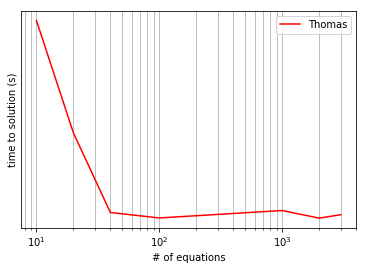

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("# of equations") # set x label
plt.ylabel("time to solution (s)") # set y label
plt.loglog(n,time_vector,"r-",label="Thomas")
plt.legend() # display legend
plt.grid(True,which="major") # turn on major grid axes
plt.grid(True,which="minor") # turn on minor grid axes

### Part 2

#### Solve using Python's built in solve command

In [77]:
def Pythons_built_in_solve_command(x):
    for i in range(0,length_n,1):
        
        #creating the grid that the thomas algorithm will evaluate
        x = np.linspace(0,L,n[i])
        
        #creating the tridiagonal matrix
        d=-2*np.ones(n[i])
        d[0]=1.0
        d[n[i]-1]=1.0
        l=np.ones(n[i]-1)
        l[n[i]-2]=0.0
        u=np.ones(n[i]-1)
        u[0]=0.0
        A=np.diag(l,-1)+np.diag(d,0)+np.diag(u,1)
        
        #defining the source term
        def source(x):
            return np.exp(-((x-a)/σ)**2)
        
        #creating the right hand side (called b)
        Δx=L/(n[i]-1)
        b=-Δx*Δx*source(x)/λ
        b[0]=T0
        b[n[i]-1]=TL
        
        r=np.linalg.solve(A,b)

#### Calculating the time used for Python's built in solve command

In [ ]:
time_vector2=np.ones(length_n)
for k in range (0,length_n):
    import time
    tic2 = time.time()
    Pythons_built_in_solve_command(x)
    toc2 = time.time()
    ts2 = toc2 - tic2 
    time_vector2[k]=ts2

#### Plotting the time used vs the number of equations, using Python's built in solve command

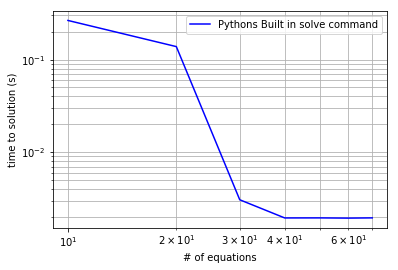

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("# of equations") # set x label
plt.ylabel("time to solution (s)") # set y label
plt.loglog(n,time_vector2,"b-",label="Pythons Built in solve command")
plt.legend() # display legend
plt.grid(True,which="major") # turn on major grid axes
plt.grid(True,which="minor") # turn on minor grid axes

### Part 3

#### Solve using Ainv

In [60]:
def Ainv(x):
    for i in range(0,length_n,1):
        
        #creating the grid that the thomas algorithm will evaluate
        x = np.linspace(0,L,n[i])
        
        #creating the tridiagonal matrix
        d=-2*np.ones(n[i])
        d[0]=1.0
        d[n[i]-1]=1.0
        l=np.ones(n[i]-1)
        l[n[i]-2]=0.0
        u=np.ones(n[i]-1)
        u[0]=0.0
        A=np.diag(l,-1)+np.diag(d,0)+np.diag(u,1)
        
        #defining the source term
        def source(x):
            return np.exp(-((x-a)/σ)**2)
        
        #creating the right hand side (called b)
        Δx=L/(n[i]-1)
        b=-Δx*Δx*source(x)/λ
        b[0]=T0
        b[n[i]-1]=TL
        
        Ainv = np.linalg.inv(A)
        T=Ainv@b

#### Calculating the time used for Ainv

In [61]:
time_vector3=np.ones(length_n)
for k in range (0,length_n):
    import time
    tic3 = time.time()
    Ainv(x)
    toc3 = time.time()
    ts3 = toc3 - tic3 
    time_vector3[k]=ts3

In [62]:
print(time_vector3)

[0.07421613 0.08799171 0.09599924 0.02647781 0.02687693 0.0177319
 0.02666211]


#### Plotting the time used vs the number of equations, using Ainv

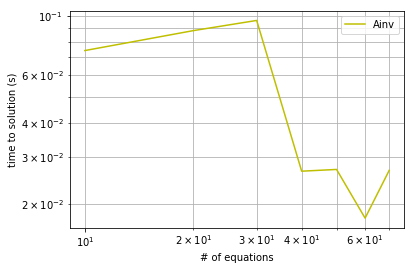

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("# of equations") # set x label
plt.ylabel("time to solution (s)") # set y label
plt.loglog(n,time_vector3,"y-",label="Ainv")
plt.legend() # display legend
plt.grid(True,which="major") # turn on major grid axes
plt.grid(True,which="minor") # turn on minor grid axes

#### Plotting Thomas, Python's built in solve command, and Ainv against # of equations on same plot

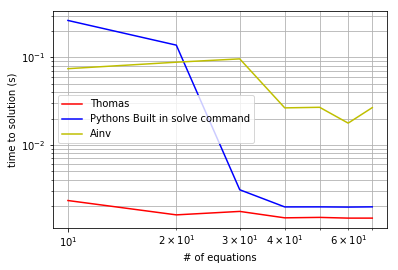

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("# of equations") # set x label
plt.ylabel("time to solution (s)") # set y label
plt.loglog(n,time_vector,"r-",label="Thomas")
plt.loglog(n,time_vector2,"b-",label="Pythons Built in solve command")
plt.loglog(n,time_vector3,"y-",label="Ainv")
plt.legend() # display legend
plt.grid(True,which="major") # turn on major grid axes
plt.grid(True,which="minor") # turn on minor grid axes